In [79]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [80]:
edges=pd.read_csv('../csv/edges.csv')
edges[['source','target','weight']].to_csv('../csv/edges_networkx.csv',index=False,header=False)

In [81]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2031
Number of edges: 12388
Average degree:  12.1989


In [82]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 904
Number of edges: 3172
Average degree:   7.0177


In [83]:
deg = g.degree()
to_remove = [n for n in deg if deg[n] == 0]
g.remove_nodes_from(to_remove)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 866
Number of edges: 3172
Average degree:   7.3256


In [84]:
spring_pos = nx.spring_layout(g)

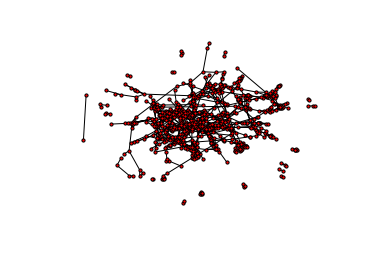

In [85]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, with_labels = False, node_size = 10)


In [86]:
parts = community.best_partition(g)
community.modularity(parts,g)


0.9229741096322283

In [87]:
values = [parts.get(node) for node in g.nodes()]
max(values)

58

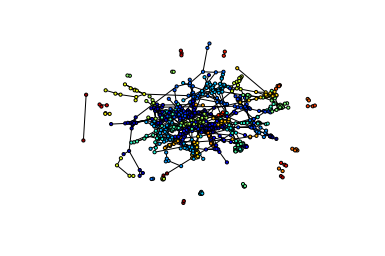

In [88]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 10, with_labels = False)


In [89]:
old_nodes_df['cluster']=0

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])

In [91]:
df=old_nodes_df

In [92]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [93]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
docs=df.label

In [95]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [96]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [97]:
df['ind']=df.index
df['terms']= docs_stemed

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [98]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [99]:
dg.sort_values('cluster size')

,cluster size,keyword,key terms
58,2,"[(advantag, 2), (industri, 2)]",[]
31,2,"[(span, 2), (practic, 2), (boundari, 2)]","[(boundari span, 2)]"
30,2,[],[]
57,2,"[(global, 2)]",[]
45,2,"[(digit, 3)]",[]
47,2,[],[]
14,2,"[(servic, 2)]",[]
51,2,"[(commentari, 2)]",[]
43,2,"[(technolog, 2), (implement, 2), (model, 2)]","[(technolog implement, 2)]"
56,2,"[(manag, 2)]",[]


In [ ]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
com=community.induced_graph(parts,G_fb)
nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)